In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки



In [3]:
# Чтение данных
data = pd.read_csv('_train_sem09__1_.zip')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(3751, 1777)

In [5]:
# Проверка на пропуски в данных
print(data.isnull().sum().value_counts())

0    1777
Name: count, dtype: int64


In [6]:
data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Activity', ylabel='count'>

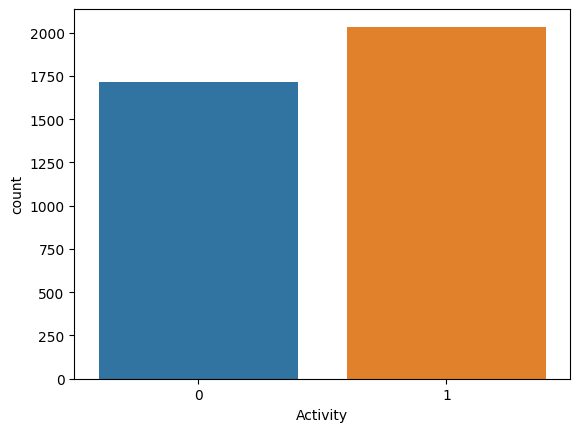

In [7]:
# Построение графика распределения значения в целевом признаке 'Activity'
sns.countplot(data = data, x = 'Activity')

In [8]:
# Проверка на мультколлинеарность признаков.
corr_matrix = data.corr()

# Получаем список признаков с высокой корреляцией (больше 0.9)
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Выводим признаки с корреляцией больше 0.9 и их значения
for feature1, feature2, correlation in high_corr_features:
    print(f"Признаки {feature1} и {feature2} имеют корреляцию {correlation}")

Признаки D125 и D116 имеют корреляцию 0.9053605929940403
Признаки D203 и D195 имеют корреляцию 0.9049023910155222
Признаки D310 и D309 имеют корреляцию 0.907837628323186
Признаки D382 и D332 имеют корреляцию 0.9104317599013122
Признаки D435 и D342 имеют корреляцию 0.9159353887682323
Признаки D566 и D565 имеют корреляцию 0.9034782613413364
Признаки D567 и D399 имеют корреляцию 0.9368232452548666
Признаки D567 и D566 имеют корреляцию 0.9130941981188366
Признаки D581 и D503 имеют корреляцию 0.9007158415493348
Признаки D587 и D454 имеют корреляцию 0.9050498542598244
Признаки D618 и D370 имеют корреляцию 0.9215263435285855
Признаки D638 и D540 имеют корреляцию 0.9789419400759339
Признаки D679 и D464 имеют корреляцию 0.9105273739112936
Признаки D682 и D467 имеют корреляцию 0.9010533291510733
Признаки D683 и D468 имеют корреляцию 0.9199693825932895
Признаки D704 и D477 имеют корреляцию 0.9026421476181201
Признаки D707 и D478 имеют корреляцию 0.9025523743174694
Признаки D718 и D407 имеют корре

In [9]:
# Создание матрицыв наблюдений Х и вектора ответов у.
X = data.drop(['Activity'], axis = 1)
y = data['Activity']

In [10]:
#Разделение выборки
from sklearn.model_selection import train_test_split #сплитование выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state= 40)

In [11]:
# Создание дэфолтной модели логистической регрессии.
log_reg = linear_model.LogisticRegression(max_iter = 1000)
# Обучение модели
log_reg.fit(X_train, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_test, y_test)))
y_test_pred = log_reg.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.77
f1_score на тестовом наборе: 0.79


### Поиск гиперпараметров с помощью GridSearchCV.

In [12]:
# Подключение библиотеки GridSearchCV
from sklearn.model_selection import GridSearchCV

# Создание сетки искомых параметров

param_grid = {
    'penalty': ['l2', 'none'] ,
    'solver': ['lbfgs', 'saga'] ,
}

# Передача модели для теста и указание доп. настроек

grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state = 40,
        max_iter = 1000
    ),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1
)

%time grid_search.fit(X_train, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 21.8 s
Wall time: 1min 32s
accuracy на тестовом наборе: 0.76
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'penalty': 'l2', 'solver': 'saga'}


----------------
>**Исходя из показателей метрики, добиться более лучшего результата не удалось. При этом значение метрики accuracy упало на 0.01.**
---------------

### Расширение сетки гиперпараметров.

In [13]:
param_grid_expansion = [
                        {'penalty': ['l2', 'none'] , # тип регуляризации
                        'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
                        'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
                       {'penalty': ['l1', 'l2'] ,
                        'solver': ['liblinear', 'saga'],
                        'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}

                       ]
grid_search_exp = GridSearchCV(
    estimator = linear_model.LogisticRegression(
        random_state = 40,
        max_iter = 1000
    ),
    param_grid = param_grid_expansion,
    cv = 5,
    n_jobs = -1
)
    
%time grid_search_exp.fit(X_train, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_exp.score(X_test, y_test)))
y_test_pred = grid_search_exp.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_exp.best_params_))

CPU times: total: 15.6 s
Wall time: 9min 13s
accuracy на тестовом наборе: 0.78
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


-------------
>**Исходя из метрики, можно заключить, что расширение сетки подбора параметров привело в квеличению качества модели, но не столько значительному.**
-----------------------

In [14]:
# Итоговые параметры наилучшей модели
print("Наилучшая модель:\n{}".format(grid_search_exp.best_estimator_))

Наилучшая модель:
LogisticRegression(C=0.1, max_iter=1000, random_state=40, solver='saga')


In [15]:
# Взглянем на результаты кросс-валидации
result_cv = pd.DataFrame(grid_search_exp.cv_results_)
result_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.629702,0.175501,0.070772,0.034289,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.756667,0.761667,0.758333,0.761667,0.738333,0.755333,0.008718,21
1,10.112780,1.553058,0.042279,0.002887,0.01,l2,sag,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}",0.755000,0.761667,0.756667,0.761667,0.738333,0.754667,0.008589,24


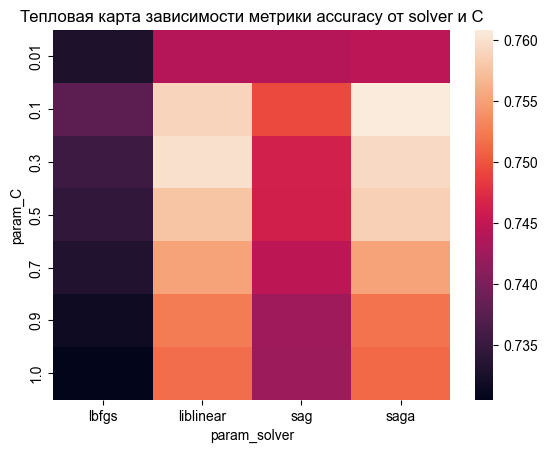

In [16]:
# график изменения точности при разных гиперпараметрах
visual = pd.pivot_table(pd.DataFrame(grid_search_exp.cv_results_),
                        values='mean_test_score', index='param_C',
                        columns='param_solver')
sns.heatmap(visual)
plt.title('Тепловая карта зависимости метрики accuracy от solver и С') 
sns.set(rc={'figure.figsize':(12, 8)}) 

--------------
>**Из графика можно заключить, что при алгоритмах 'saga' и 'liblinear', и наименьшем С, метрика показывает более хороший результат.**
--------------

### Поиск гиперпараметров с помощью RandomizedSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=40, max_iter=1000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search.fit(X_train, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(random_search.score(X_test, y_test)))
y_test_pred = random_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 15.8 s
Wall time: 2min 40s
accuracy на тестовом наборе: 0.78
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.23}


---------------
>**Исходя из метрики, более лучших гиперпараметров найти не удалось.**
---------------

## Создание модели случайного леса

In [18]:
rf = ensemble.RandomForestClassifier(random_state=40)
#Обучение модели
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 1.00
Test: 0.83


---------------
>**Исходя из полученной метрики можно сделать вывод, что модель переобучена.**
---------------

In [19]:
# Создание сетки гиперпараметров для поиска оптимума.
param_distributions = {'n_estimators': list(range(80, 600, 40)),
              'min_samples_leaf': [5, 7, 9],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }

rf_search = RandomizedSearchCV(
    estimator = ensemble.RandomForestClassifier(random_state = 40),
    param_distributions=param_distributions,
    cv = 5,
    n_iter = 10,
    n_jobs = -1
)

%time rf_search.fit(X_train, y_train) 
y_train_pred = rf_search.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(rf_search.score(X_test, y_test)))
y_test_pred = rf_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(rf_search.best_params_))

CPU times: total: 7.2 s
Wall time: 40.3 s
f1_score на обучающем наборе: 0.94
accuracy на тестовом наборе: 0.79
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'n_estimators': 520, 'min_samples_leaf': 5, 'max_depth': 40}


-------------
>**Удалось снизить переобученность модели при найденных гиперпараметров. Метрика f1-score немного улучшилась**
----------------

In [20]:
#Поиск оптимальных гиперпараметров через GridSearchCV
param_grid = {'n_estimators': list(range(80, 600, 40)),
              'min_samples_leaf': [5, 7, 9],
              'max_depth': [10, 15, 20, 25]
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=40), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_train_pred = grid_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_forest.score(X_test, y_test)))
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: total: 6.03 s
Wall time: 7min 15s
f1_score на обучающем наборе: 0.94
accuracy на тестовом наборе: 0.79
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 160}


In [21]:
#Поиск оптимальных гиперпараметров через GridSearchCV с отличной от первого варианта глубиной
param_grid = {'n_estimators': list(range(80, 600, 40)),
              'min_samples_leaf': [5, 7, 9],
              'max_depth': [25, 30, 35, 40]
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=40), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_train_pred = grid_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_forest.score(X_test, y_test)))
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: total: 5.81 s
Wall time: 7min 22s
f1_score на обучающем наборе: 0.94
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.82
Наилучшие значения гиперпараметров: {'max_depth': 25, 'min_samples_leaf': 5, 'n_estimators': 160}


-----------
>**Исходя из сравнения метрик двух сеток, можно заключить, что качество модели лучше с чуть большей глубиной модели.**
----------------

## Подбор гиперпараметров с помощью Hyperopt. 

In [22]:
#Импорт библиотеки
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials


In [23]:
#Создание пространства гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 100, 600, 10),
       'max_depth' : hp.quniform('max_depth', 5, 40, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 15, 1)
      }

In [24]:
random_state = 40
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    score = metrics.f1_score(y, model.predict(X))
    
    return -score

In [25]:
%%time

trials = Trials()

best=fmin(hyperopt_rf, 
          space=space, 
          algo=tpe.suggest,
          max_evals=40, 
          trials=trials, 
          rstate=np.random.default_rng(random_state) 
         )
print("Наилучшие значения гиперпараметров {}".format(best))

  0%|          | 0/40 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 40/40 [02:42<00:00,  4.06s/trial, best loss: -0.9780621572212065]
Наилучшие значения гиперпараметров {'max_depth': 32.0, 'min_samples_leaf': 3.0, 'n_estimators': 430.0}
CPU times: total: 2min 42s
Wall time: 2min 42s


In [26]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на обучающем наборе: 0.98
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.82


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection #методы разделения и валидации

model = RandomForestClassifier(max_depth = 32, min_samples_leaf = 3, n_estimators = 240, random_state = 40)

#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=10)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, 
    X=X_train, 
    y=y_train, 
    cv=skf, 
    scoring='f1', 
    return_train_score=True 
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.98
Valid k-fold mean f1: 0.81


In [28]:
models = [
    RandomForestClassifier(
        n_estimators=500,
        min_samples_leaf=3,
        random_state=40,
        max_depth=31
    ),
    RandomForestClassifier(
        n_estimators=160,
        min_samples_leaf=5,
        random_state=40,
        max_depth=25
    ),
]

In [29]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model, 
        X=X, 
        y=y,  
        cv=cv,  
        scoring=scoring,  
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

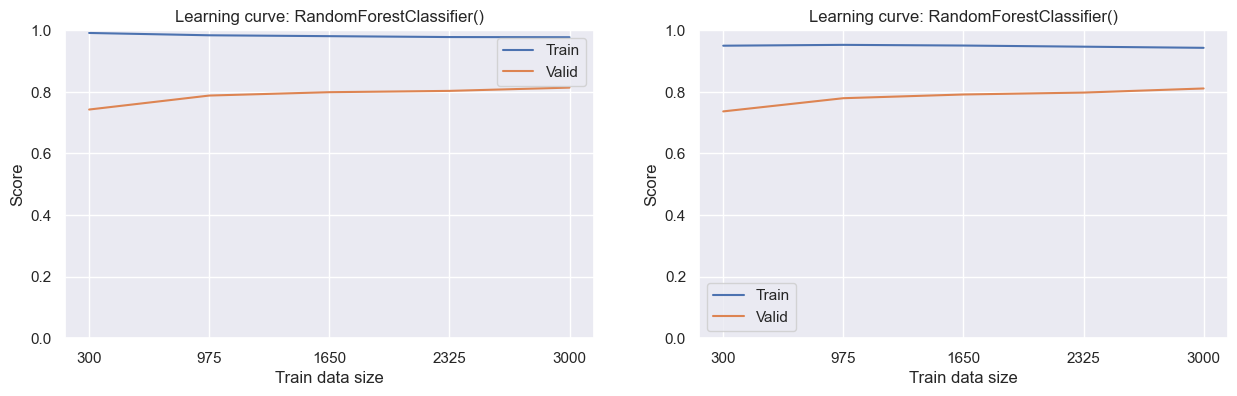

In [30]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X, y, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)

Best threshold = 0.45, F1-Score = 0.82


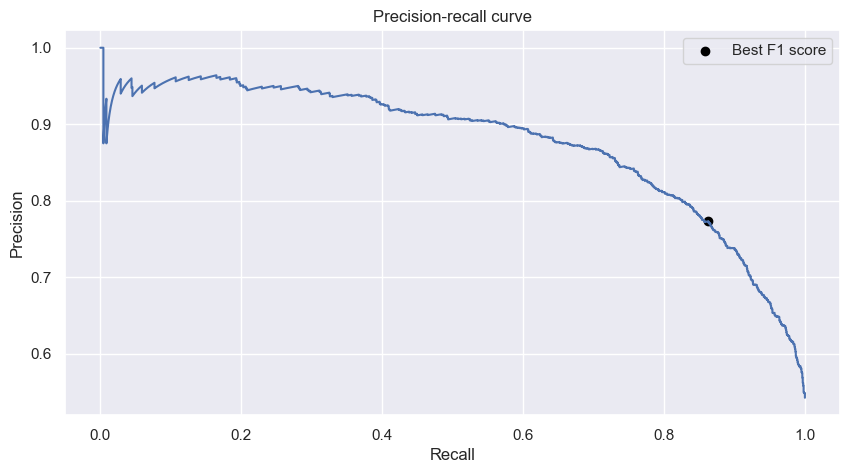

In [40]:
#Создаём модель с оптимальными гиперпараметрами
model = ensemble.RandomForestClassifier(
        n_estimators=500,
        min_samples_leaf=3,
        random_state=40,
        max_depth=31

)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
#Выделяем столбец с вероятностями для класса 1
y_cv_proba_pred = y_cv_proba_pred[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума F1
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))


fig, ax = plt.subplots(figsize=(10, 5)) 

ax.plot(recall, precision)

ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')

ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

ax.legend();

------------------
>**Исходя из метрик с разными гиперпараметрами, найденными с помощью Hyperopt, не удалось достаточно улучшить качесвто модели.**
----------------

### Поиск гиперпараметров с помощью Optuna

In [1]:
import optuna

In [33]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 300, 10)
  max_depth = trial.suggest_int('max_depth', 15, 40, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

In [34]:

%%time
# Создание объекта исследования
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")

study.optimize(optuna_rf, n_trials=20)

[I 2024-02-23 12:52:22,693] A new study created in memory with name: RandomForestClassifier


[I 2024-02-23 12:52:24,999] Trial 0 finished with value: 0.9569990850869168 and parameters: {'n_estimators': 160, 'max_depth': 22, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9569990850869168.
[I 2024-02-23 12:52:27,169] Trial 1 finished with value: 0.929551692589204 and parameters: {'n_estimators': 170, 'max_depth': 18, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9569990850869168.
[I 2024-02-23 12:52:28,581] Trial 2 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 100, 'max_depth': 23, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9569990850869168.
[I 2024-02-23 12:52:31,086] Trial 3 finished with value: 0.9581934696368629 and parameters: {'n_estimators': 160, 'max_depth': 36, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.9581934696368629.
[I 2024-02-23 12:52:35,225] Trial 4 finished with value: 0.9715857011915675 and parameters: {'n_estimators': 280, 'max_depth': 17, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.9715

CPU times: total: 58.4 s
Wall time: 58.6 s


In [35]:
# Вывод результатов метрики на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 240, 'max_depth': 32, 'min_samples_leaf': 3}
f1_score на обучающем наборе: 0.98


In [36]:
# Расчёт точности для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.82


In [37]:
%%time
# Продолжение итераций
study.optimize(optuna_rf, n_trials=10)

[I 2024-02-23 12:53:29,130] Trial 20 finished with value: 0.9200244200244201 and parameters: {'n_estimators': 300, 'max_depth': 25, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.977141115513563.
[I 2024-02-23 12:53:32,963] Trial 21 finished with value: 0.977141115513563 and parameters: {'n_estimators': 240, 'max_depth': 37, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.977141115513563.
[I 2024-02-23 12:53:36,728] Trial 22 finished with value: 0.977141115513563 and parameters: {'n_estimators': 240, 'max_depth': 37, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.977141115513563.
[I 2024-02-23 12:53:39,984] Trial 23 finished with value: 0.9582189691979262 and parameters: {'n_estimators': 230, 'max_depth': 33, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.977141115513563.
[I 2024-02-23 12:53:44,165] Trial 24 finished with value: 0.9768574908647991 and parameters: {'n_estimators': 270, 'max_depth': 38, 'min_samples_leaf': 3}. Best is trial 14 with value: 0

CPU times: total: 37.3 s
Wall time: 37.4 s


In [38]:
# Расчёт точности выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.82


---------------
>**Исходя из полученных метрик с импользованием оптимального гиперпараметра, полученного с помощью алгоритма Optuna, не удалось улучшить модель.**
-------------

------------------
### **Общий вывод по алгоритмам поиска гиперпарамтеров:**
* Алгоритмы GridSearchCV и RandomizedSearchCV тратили больше времени на подбор оптимальных гиперпараметров и выдавали более худший результат, нежели алгоритмы Hyperopt и Optuna.
* Оптимальным выбором для побора гиперпараметров можно считать алгроитмы Hyperopt и Optuna, т.к. они требуют меньше времени на поиск и благодаря Байесовскому подходу находят более оптимальные гиперпараметры.
----------------

>**Далее  проверка некоторых моментов из интереса.**

In [47]:
# Попытка добиться лучшей метрики при ограничении глубины дерева
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 800, 10)
  max_depth = trial.suggest_int('max_depth', 3, 15, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 9, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

In [48]:

%%time
# Создание объекта исследования
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")

study.optimize(optuna_rf, n_trials=40)

[I 2024-02-23 13:32:43,048] A new study created in memory with name: RandomForestClassifier
[I 2024-02-23 13:32:45,660] Trial 0 finished with value: 0.9019006744328633 and parameters: {'n_estimators': 230, 'max_depth': 14, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9019006744328633.
[I 2024-02-23 13:32:48,526] Trial 1 finished with value: 0.8581122763726096 and parameters: {'n_estimators': 340, 'max_depth': 8, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9019006744328633.
[I 2024-02-23 13:32:54,745] Trial 2 finished with value: 0.9096477794793263 and parameters: {'n_estimators': 550, 'max_depth': 13, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.9096477794793263.
[I 2024-02-23 13:32:56,205] Trial 3 finished with value: 0.8563484708063022 and parameters: {'n_estimators': 170, 'max_depth': 8, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.9096477794793263.
[I 2024-02-23 13:33:07,419] Trial 4 finished with value: 0.9636419187289949 and parameters: {'n_es

CPU times: total: 3min 19s
Wall time: 3min 19s


In [46]:
# Вывод результатов метрики на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))
# Расчёт точности выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения гиперпараметров {'n_estimators': 420, 'max_depth': 15, 'min_samples_leaf': 3}
f1_score на обучающем наборе: 0.96
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.82


In [49]:
%%time
# Продолжение итераций
study.optimize(optuna_rf, n_trials=10)

[I 2024-02-23 13:39:41,605] Trial 40 finished with value: 0.9914320685434518 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.9923336399877338.
[I 2024-02-23 13:39:43,988] Trial 41 finished with value: 0.9920440636474909 and parameters: {'n_estimators': 140, 'max_depth': 15, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.9923336399877338.
[I 2024-02-23 13:39:46,622] Trial 42 finished with value: 0.9867976665643229 and parameters: {'n_estimators': 160, 'max_depth': 14, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.9923336399877338.
[I 2024-02-23 13:39:49,072] Trial 43 finished with value: 0.9871086556169429 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.9923336399877338.
[I 2024-02-23 13:39:51,665] Trial 44 finished with value: 0.9867976665643229 and parameters: {'n_estimators': 160, 'max_depth': 14, 'min_samples_leaf': 1}. Best is trial 24 with va

CPU times: total: 25 s
Wall time: 25.1 s


In [50]:
# Вывод результатов метрики на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))
# Расчёт точности выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения гиперпараметров {'n_estimators': 470, 'max_depth': 15, 'min_samples_leaf': 1}
f1_score на обучающем наборе: 0.99
accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.82


--------------
>**Исходя из полученных метрик, можно заключить, что изменение глубины и кол-ва деревьев привело к снижению переобученности модели.**
---------------

In [61]:
#Создаём модель
model = ensemble.RandomForestClassifier(
    n_estimators = 420,
    criterion='gini', #критерий информативности
    max_depth=15, #ограничиваем глубину дерева
    random_state=40, #генератор случайных чисел
    class_weight='balanced', #веса классов
    min_samples_leaf=3
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, 
    X=X,
    y=y, 
    cv=skf, 
    scoring='f1', 
    return_train_score=True 
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))



Train k-fold mean f1: 0.96
Valid k-fold mean f1: 0.81


In [62]:
#Создаём модель
model = ensemble.RandomForestClassifier(
    n_estimators = 420,
    criterion='gini', #критерий информативности
    max_depth=15, #ограничиваем глубину дерева
    random_state=40, #генератор случайных чисел
    class_weight='balanced', #веса классов
    min_samples_leaf=3
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator = model, #модель
    X = X, #матрица наблюдений X
    y = y, #вектор ответов y
    cv = skf, #кросс-валидатор
    scoring = 'f1' #метрика
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 300  975 1650 2325 3000]
Train scores: 
 [[0.98644986 0.99716714 0.99716714 0.99716714 0.99716714]
 [0.9787234  0.9823584  0.98563734 0.98563734 0.98563734]
 [0.97558329 0.9738277  0.97441481 0.9738453  0.9738453 ]
 [0.96781883 0.96629213 0.96738266 0.96838735 0.97183099]
 [0.96232242 0.9593294  0.96273483 0.96570899 0.96326027]]
Valid scores: 
 [[0.75555556 0.74008811 0.72203765 0.75420875 0.73637375]
 [0.76806084 0.79146919 0.77326969 0.80048077 0.79669031]
 [0.77902622 0.80815348 0.80246914 0.79900744 0.80680437]
 [0.79297365 0.82593037 0.77902622 0.80697385 0.8       ]
 [0.81155779 0.82750302 0.78947368 0.8228005  0.81074481]]


In [64]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
 
print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)

Train k-fold f1 scores [0.99502368 0.98359877 0.97430328 0.96834239 0.96267118]
Valid k-fold f1 scores [0.74165276 0.78599416 0.79909213 0.80098082 0.81241596]


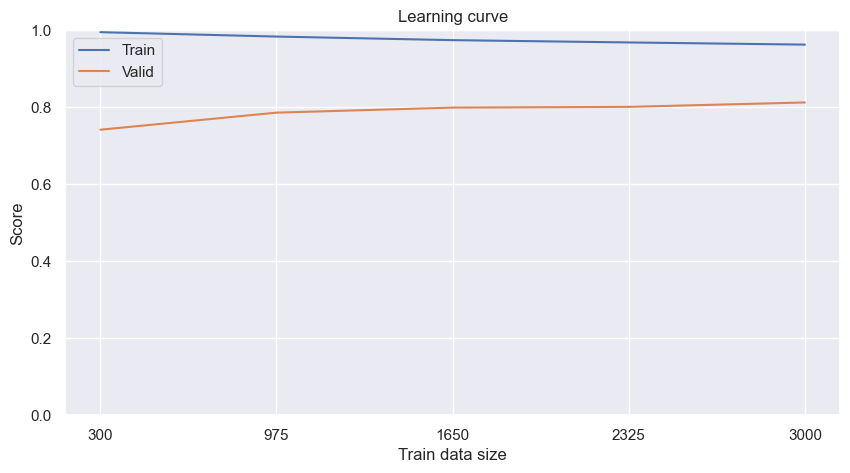

In [65]:
#Визуализируем кривую обучения
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
#Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
#Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
#Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
#Отображаем легенду
ax.legend();